In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### READING CSV

In [7]:
df=pd.read_csv("./dataset/survey_results_public.csv")
df1=pd.read_csv("./dataset/survey_results_public_2020.csv")
print(len(df.index))
print(len(df1.index))

88883
64461


In [11]:
df=df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp","UndergradMajor"]]
df=df.rename({"ConvertedComp":"Salary"},axis=1)
df.head()


,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,United Kingdom,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN,NaN
1,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,"Not employed, but looking for work",NaN,NaN
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
4,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)",9,Employed full-time,NaN,"Computer science, computer engineering, or sof..."


In [12]:
df1=df1[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp","UndergradMajor"]]
df1=df1.rename({"ConvertedComp":"Salary"},axis=1)
df1.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,"Computer science, computer engineering, or sof..."
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,"Computer science, computer engineering, or sof..."
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,"Computer science, computer engineering, or sof..."
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,"Computer science, computer engineering, or sof..."


In [14]:
# Removing NULL salary
df=df[df["Salary"].notnull()]
df1=df1[df1["Salary"].notnull()]

print(df.shape[0])
print(df1.shape[0])

55823
34756


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
Country           34756 non-null object
EdLevel           34188 non-null object
YearsCodePro      34621 non-null object
Employment        34717 non-null object
Salary            34756 non-null float64
UndergradMajor    32228 non-null object
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [17]:
# Drop NA rows
df=df.dropna()
df1=df1.dropna()
print(df.shape[0])
print(df1.shape[0])

50264
31559


In [65]:
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro      0
Employment        0
Salary            0
UndergradMajor    0
dtype: int64

### MERGING 2 DF

In [18]:
df=pd.concat([df,df1])

In [20]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0,Mathematics or statistics
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."


In [25]:
df.shape[0]

81823

In [17]:
def save():
    df.to_csv(r'dataset\final_dataset.csv',index=False)
def save_encoded():
    df.to_csv(r'dataset\final_dataset_encoded.csv',index=False)

In [4]:
def read(df):
    df=pd.read_csv("./dataset/final_dataset.csv")
def read_encoded(df):
    df=pd.read_csv("./dataset/final_dataset_encoded.csv")

In [24]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0,Web development or web design
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0,Mathematics or statistics
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
12,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",8,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."


### Cleaning UG major column

In [15]:
df["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering                   47661
Another engineering discipline                                                     6576
Information systems, information technology, or system administration              5466
A natural science                                                                  3424
Web development or web design                                                      2599
A humanities discipline                                                            1673
A social science                                                                   1441
A business discipline (ex. accounting, finance, marketing)                         1052
I never declared a major                                                            675
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      461
A health science                                                                    248
Name: UndergradMajor, dtype: int

In [27]:
df=df[df["UndergradMajor"]!="Mathematics or statistics"]
df=df[df["UndergradMajor"]!="Fine arts or performing arts (ex. graphic design, music, studio art)" ]
df=df[df["UndergradMajor"]!="A humanities discipline (such as literature, history, philosophy, etc.) " ]
df=df[df["UndergradMajor"]!="A business discipline (such as accounting, finance, marketing, etc.)" ]

In [31]:
def ug(x):
     if "A natural science" in x:
          return "A natural science"
     if "A humanities discipline" in x:
          return "A humanities discipline"
     if "A health science" in x:
          return "A health science"
     if "Another engineering discipline" in x:
          return "Another engineering discipline" 
     if "A social science" in x:
          return "A social science"

     return x
df['UndergradMajor']=df['UndergradMajor'].apply(ug)

### Cleaning Country column

In [35]:
df["Country"].value_counts()

United States                            19891
India                                     6185
United Kingdom                            5437
Germany                                   4679
Canada                                    3098
                                         ...  
Mali                                         1
Andorra                                      1
Democratic People's Republic of Korea        1
Seychelles                                   1
Malawi                                       1
Name: Country, Length: 169, dtype: int64

In [36]:
def shorten(cat,cutoff):
    mp={}
    for i in range(len(cat)):
        if(cat.values[i]>=cutoff):
            mp[cat.index[i]]=cat.index[i]
        else:
            mp[cat.index[i]]='Other'
    return mp


In [37]:
cnt_mp=shorten(df.Country.value_counts(),400)
df["Country"]=df["Country"].map(cnt_mp)
df.Country.value_counts()

United States         19891
Other                  9034
India                  6185
United Kingdom         5437
Germany                4679
Canada                 3098
France                 2478
Brazil                 2251
Poland                 1798
Spain                  1751
Australia              1731
Netherlands            1645
Russian Federation     1367
Sweden                 1237
Italy                  1189
Switzerland             810
Turkey                  771
Mexico                  705
Pakistan                696
Ukraine                 689
Israel                  677
Romania                 657
Belgium                 641
Iran                    624
Austria                 624
Czech Republic          608
Norway                  607
Denmark                 561
South Africa            560
Ireland                 553
Portugal                526
Argentina               521
Finland                 506
New Zealand             489
Greece                  458
Bulgaria            

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76944 entries, 2 to 64154
Data columns (total 6 columns):
Country           76944 non-null object
EdLevel           76944 non-null object
YearsCodePro      76944 non-null object
Employment        76944 non-null object
Salary            76944 non-null float64
UndergradMajor    76944 non-null object
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


In [39]:
print(df.shape[0])

76944


### Removing salary outliers

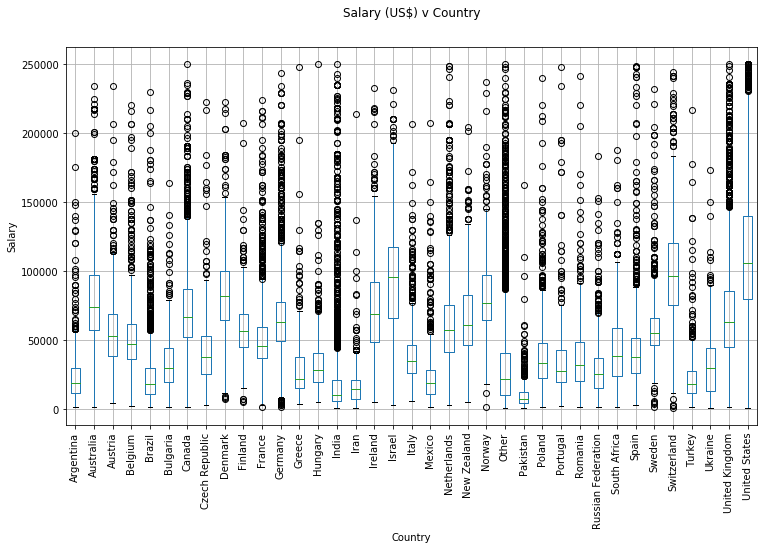

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [43]:
df.describe()

,Salary
count,71276.000000
mean,62917.877448
std,48723.085294
min,1000.000000
25%,24504.000000
50%,52942.000000
75%,88181.500000
max,250000.000000


In [16]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Other,Bachelor’s degree,1.0,Employed full-time,8820.0,Web development or web design
1,United States,Bachelor’s degree,0.5,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
2,New Zealand,Less than a Bachelors,4.0,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
3,United States,Master’s degree,8.0,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."
4,Germany,Post grad,2.0,Employed full-time,57060.0,"Computer science, computer engineering, or sof..."


In [41]:
df=df[df["Salary"]<=250000]
df=df[df["Salary"]>=1000]

In [11]:
df.shape[0]

88883

In [48]:
save_encoded()

### Cleaning YearsCodePro column

In [51]:
df["YearsCodePro"].value_counts()

3      7585
2      7372
5      6433
4      6176
6      4601
10     4267
1      3837
7      3731
8      3631
0.5    2934
12     2248
15     2140
9      2052
20     1885
11     1717
13     1434
14     1201
18      963
16      862
25      714
19      664
17      653
22      639
21      544
30      431
23      426
24      317
26      211
28      195
35      187
27      177
32      156
33      118
29      112
34      104
31      103
40       86
38       79
36       66
37       54
39       44
42       27
41       23
43       17
50       16
44       14
45       13
50        5
48        4
47        3
49        3
46        2
Name: YearsCodePro, dtype: int64

In [50]:
df["YearsCodePro"]=df["YearsCodePro"].apply(lambda x: 50 if x=='More than 50 years' else x)
df["YearsCodePro"]=df["YearsCodePro"].apply(lambda x: 0.5 if x=='Less than 1 year' else x)

### Cleaning Edlevel column

In [54]:
df["EdLevel"].value_counts()


Bachelor’s degree        37626
Master’s degree          18821
Less than a Bachelors    11626
Post grad                 3203
Name: EdLevel, dtype: int64

In [53]:
def ed(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor’s degree"
    if 'Master’s degree' in x:
        return "Master’s degree"
    if 'Professional degree' in x or 'Other doctoral' in x:
        return "Post grad"
    return 'Less than a Bachelors'
df['EdLevel']=df['EdLevel'].apply(ed)

In [27]:
# save()
df=pd.read_csv("./dataset/final_dataset.csv")
print(df.shape[0])

71276


In [28]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,Other,Bachelor’s degree,1.0,Employed full-time,8820.0,Web development or web design
1,United States,Bachelor’s degree,0.5,Employed full-time,61000.0,"Computer science, computer engineering, or sof..."
2,New Zealand,Less than a Bachelors,4.0,Employed full-time,95179.0,"Computer science, computer engineering, or sof..."
3,United States,Master’s degree,8.0,Employed full-time,90000.0,"Computer science, computer engineering, or sof..."
4,Germany,Post grad,2.0,Employed full-time,57060.0,"Computer science, computer engineering, or sof..."


## Label Encoding columns

In [29]:
from sklearn.preprocessing import LabelEncoder
le_edu=LabelEncoder()
df['EdLevel']=le_edu.fit_transform(df['EdLevel'])
df['EdLevel'].value_counts()
print(le_edu.classes_)
print(le_edu.transform(list(le_edu.classes_)))

['Bachelor’s degree' 'Less than a Bachelors' 'Master’s degree' 'Post grad']
[0 1 2 3]


In [30]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df["Country"].value_counts()
print(le_country.classes_)
print(le_country.transform(list(le_country.classes_)))

['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Iran' 'Ireland' 'Israel' 'Italy' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other' 'Pakistan' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'United States']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


In [31]:
le_ug=LabelEncoder()
df['UndergradMajor']=le_ug.fit_transform(df['UndergradMajor'])
df['UndergradMajor'].value_counts()
print(le_ug.classes_)
print(le_ug.transform(list(le_ug.classes_)))

['A business discipline (ex. accounting, finance, marketing)'
 'A health science' 'A humanities discipline' 'A natural science'
 'A social science' 'Another engineering discipline'
 'Computer science, computer engineering, or software engineering'
 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'
 'I never declared a major'
 'Information systems, information technology, or system administration'
 'Web development or web design']
[ 0  1  2  3  4  5  6  7  8  9 10]


In [32]:
le_emp=LabelEncoder()
df['Employment']=le_emp.fit_transform(df['Employment'])
df['Employment'].value_counts()
print(le_emp.classes_)
print(le_emp.transform(list(le_emp.classes_)))

['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
[0 1 2]


In [33]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,UndergradMajor
0,23,0,1.0,0,8820.0,10
1,36,0,0.5,0,61000.0,6
2,21,1,4.0,0,95179.0,6
3,36,2,8.0,0,90000.0,6
4,11,3,2.0,0,57060.0,6


In [34]:
save_encoded()

In [35]:
df.shape[0]

71276